# Developing the mapping function for Mesoscale Convective Regions

#### The main purpose of this notebook is to develop the tool to track:

- deep convective regions in a km scale simulation, 

- correlation between total cloud cover and severe precipitation. 

#### The plotting function 'map' can do a zooming on 

- pacific_ocean or its tropical area,

- atlantic_ocean or its tropical area,

- indian_ocean or its tropical area.

#### Users can also zoom in by parsing the latitude and longitude bands. 

In [2]:
import sys
from aqua import Reader
sys.path.insert(0, '../../../')
from tropical_rainfall import Tropical_Rainfall

Running tropical rainfall diagnostic...
Reading configuration yaml file..


In [3]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, loglevel='warning')

In [4]:
if diag.tools.get_machine()=='lumi':
    reader  = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly")
    data    = reader.retrieve(var=["tprate"])
else:
    reader  = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
    data    = reader.retrieve(var=["tprate"])

2023-11-10 16:28:07 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['pr'].
2023-11-10 16:28:07 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-11-10 16:28:07 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['pr'].
2023-11-10 16:28:07 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-11-10 16:28:07 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-11-10 16:28:07 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right


#### The function can be applied to one dataset :

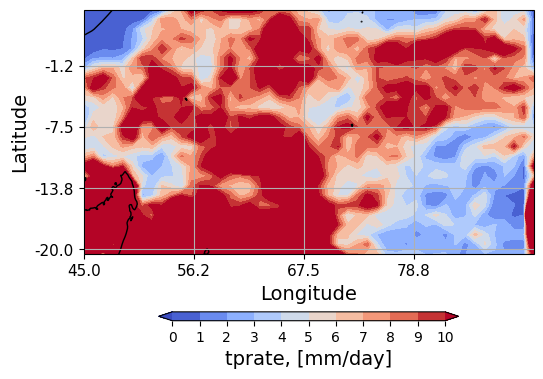

In [5]:
diag.map(data = data,vmin=0, vmax=10,  latmax=5, latmin=-20, lonmax = 90, lonmin=45)

#### Or for a set of datasets or different variables:

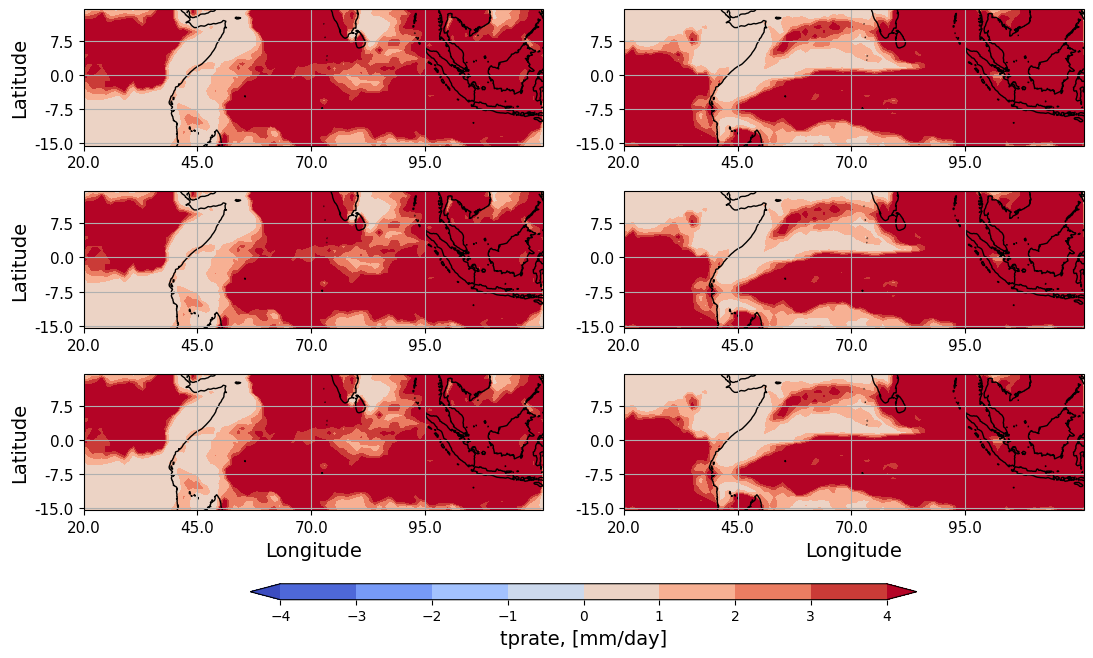

In [17]:
diag.map(data = [data.isel(time=5), data.isel(time=10), data.isel(time=5), data.isel(time=10), data.isel(time=5), data.isel(time=10)], 
         vmin=-4, vmax=4, \
         indian_ocean=True, tropical=True)

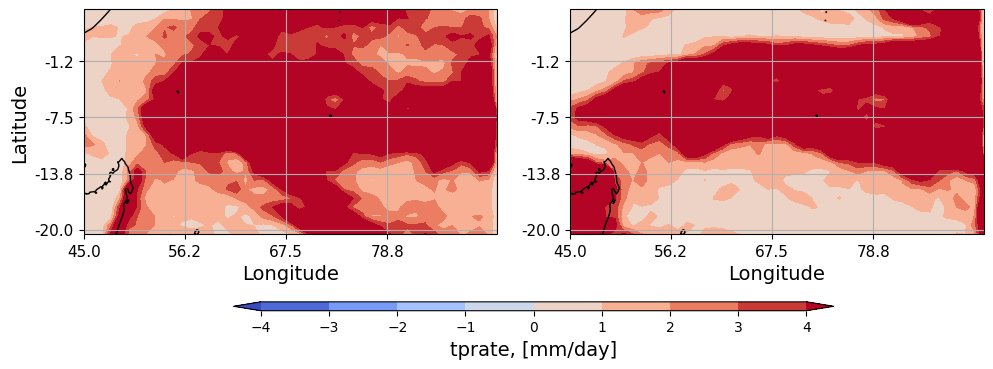

In [19]:
diag.map(data = [data.isel(time=5), data.isel(time=10)], vmin=-4, vmax=4,\
    latmax=5, latmin=-20, lonmax = 90, lonmin=45) 

#### The map for high-resolution data:

In [ ]:
if diag.tools.get_machine()!=lumi:
    reader              = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="2D_1h_native")
    ifs_tco1279_orca025_retrived = reader.retrieve()